# CUDA Practice without a GPU
In this notebook, I'll show you how you can practice CUDA with the cheapest way possible if you do not own an NVIDA chip of any sort. Prior to starting the runtime, go to `Edit` on the top left corner of the page. Click on `Notebook Settings` and choose `GPU` for the accelerator option. Before we run any commands, please make sure your Google drive is successfully mounted to the Notebook. These 2 steps are super important!

## `cd` to Practice Directory

As how you would operate on your local machine, `cd` your way to the directory or folder you will be working on. Note: usually, running the commands with `!` in front of it suffice, but the `%` in front of cd ensures that the _entire_ notebook is now in the newly specified directory. If we were to run `!cd xxx/yyy`, only that cell would move to that new directory, but the next cell would go back to the root directory again.

In [1]:
# input your own path here
%cd /content/drive/MyDrive/projects/cuda
!pwd
!ls

/content/drive/MyDrive/projects/cuda
/content/drive/MyDrive/projects/cuda
a.out  CUDA_on_Colab.ipynb  HelloWorld.cpp  test  test.cu


## Executing a C++ program

Once you have moved to your current directory, upload the c++ program to the same directory.


1.   On the left of your screen, you should see a vertical navigation bar, click on the folder icon.

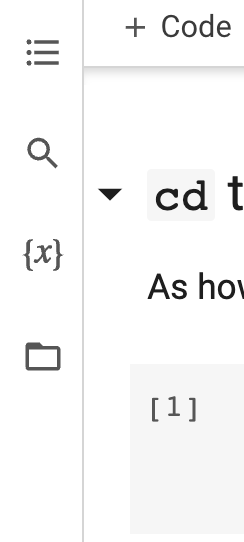

2.   Work through the directory tree and find your current working directory. On your working directory's folder icon, right click and select `New File`.

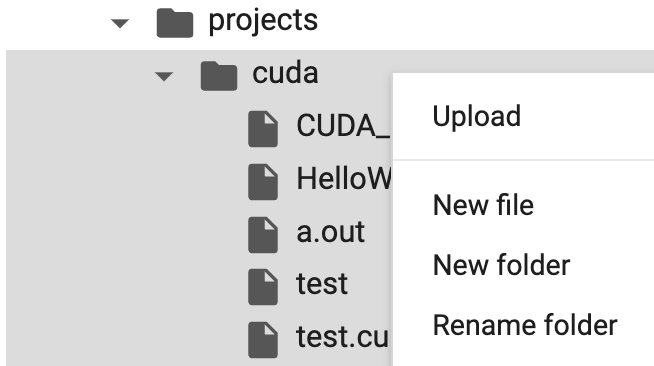
3.   Create a file called `HelloWorld.cpp` (or whatever you want).

4.   Double click on the new file you just created, and a separate tab that looks like your generic editor should appear on the right hand side of your page. Input a "Hello World" statement for now. In my own case, I included a stupid `isPrime` function as well. Your Colab should look like this:

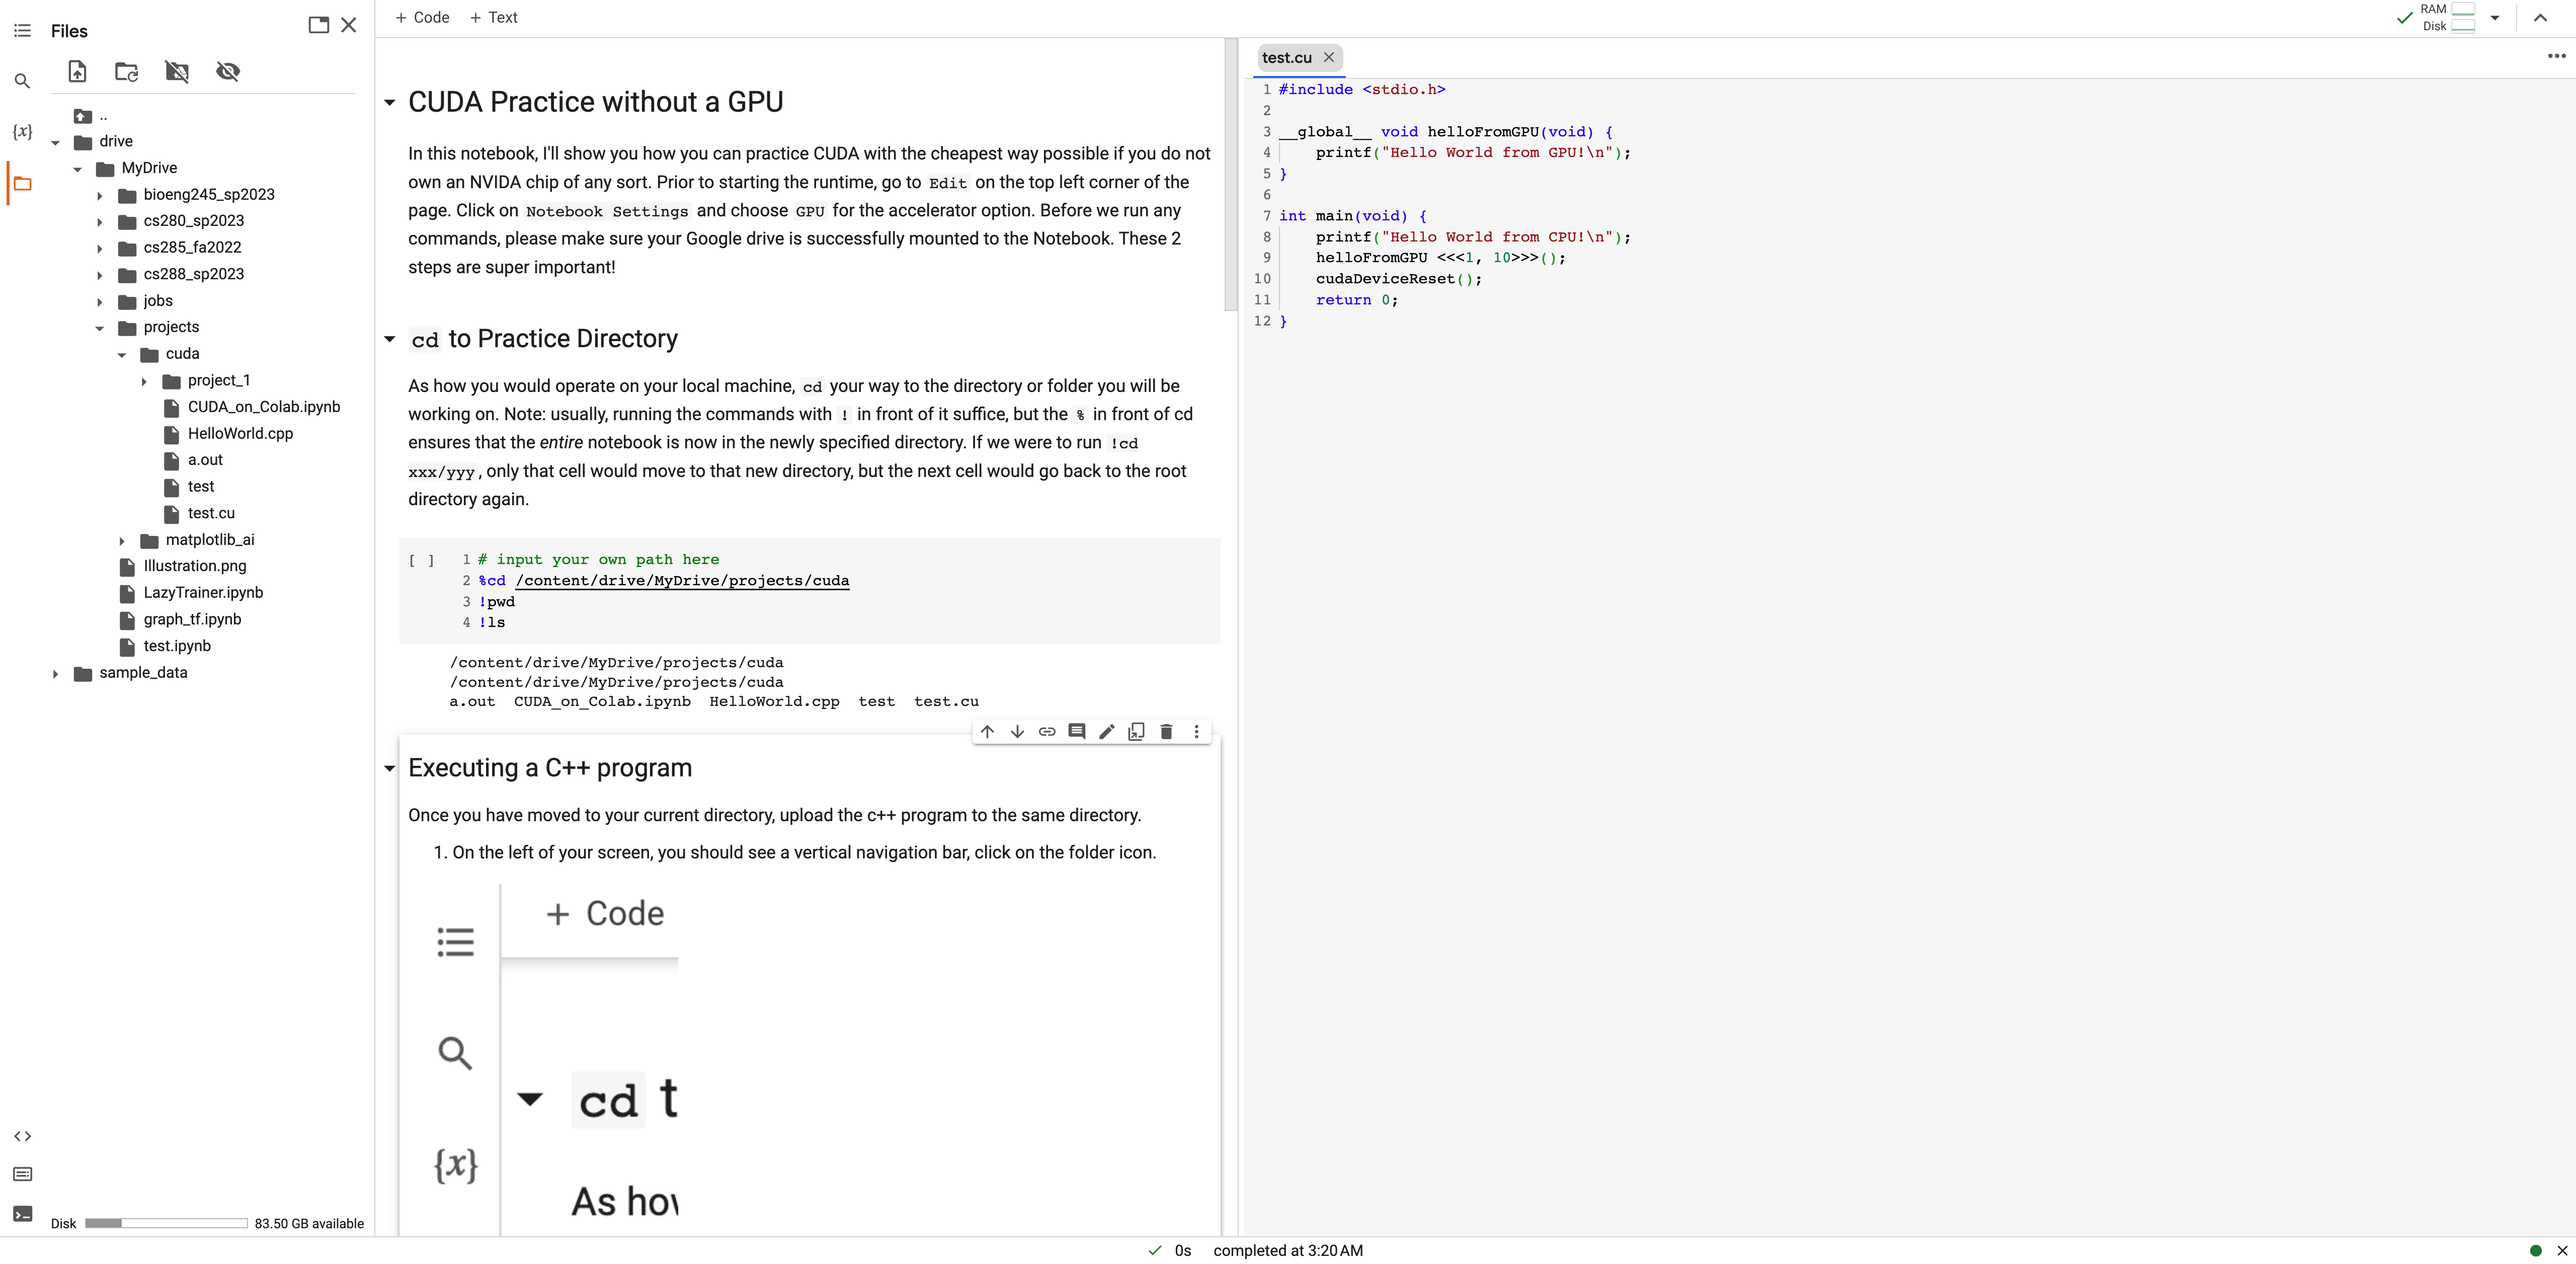

Now, execute the `cpp` file you just created how you normally would on your own local machine.

In [2]:
!g++ HelloWorld.cpp
!./a.out

Hello world!
Is 1 prime?
No
Is 2 prime?
Yes
Is 3 prime?
Yes
Is 4 prime?
No
Is 5 prime?
Yes
Is 6 prime?
No


Perfect. Now that everything is working as it should, let's move on to CUDA.

## CUDA on Colab

First, run the command `!which nvcc` to see if the CUDA compiler is successfully installed in your environment. If you're using Google colab, it should automatically be installed.

In [3]:
!which nvcc

/usr/local/cuda/bin/nvcc


Secondly, run `!ls -l /dev/nv*` to see if there is an NVIDIA GPU correctly "mounted" to your current Colab environment. You should see couple lines ending with something like `/dev/nvidia0` and whatnot. If this command returns `ls: cannot access '/dev/nv*': No such file or directory` instead, that means you may not have initialized the runtime with a GPU. To work properly, you need to restart the runtime again following the step from the beginning of this notebook.

In my case with the notebook correctly set up, the output looks like this:
```
crw-rw-rw- 1 root root 195,   0 Jul 16 10:07 /dev/nvidia0
crw-rw-rw- 1 root root 195, 255 Jul 16 10:07 /dev/nvidiactl
crw-rw-rw- 1 root root 242,   0 Jul 16 10:07 /dev/nvidia-uvm
crw-rw-rw- 1 root root 242,   1 Jul 16 10:07 /dev/nvidia-uvm-tools

/dev/nvidia-caps:
total 0
cr-------- 1 root root 245, 1 Jul 16 10:07 nvidia-cap1
cr--r--r-- 1 root root 245, 2 Jul 16 10:07 nvidia-cap2
```

In [4]:
!ls -l /dev/nv*

crw-rw-rw- 1 root root 195,   0 Jul 16 10:07 /dev/nvidia0
crw-rw-rw- 1 root root 195, 255 Jul 16 10:07 /dev/nvidiactl
crw-rw-rw- 1 root root 242,   0 Jul 16 10:07 /dev/nvidia-uvm
crw-rw-rw- 1 root root 242,   1 Jul 16 10:07 /dev/nvidia-uvm-tools

/dev/nvidia-caps:
total 0
cr-------- 1 root root 245, 1 Jul 16 10:07 nvidia-cap1
cr--r--r-- 1 root root 245, 2 Jul 16 10:07 nvidia-cap2


Using the exact same procedure as we did earlier when creating the C++ file, create another file called `test.cu`. The `.cu` extension is for the CUDA compiler to run. In this file, type in something like:
```cpp
#include <stdio.h>

__global__ void helloFromGPU(void) {
    printf("Hello World from GPU!\n");
}

int main(void) {
    printf("Hello World from CPU!\n");
    helloFromGPU <<<1, 10>>>();
    cudaDeviceReset();
    return 0;
}
```

Compile `test.cu` using `nvcc`.

In [8]:
!nvcc test.cu -o test

Run the executable file `test` how you normally would (`./test`). This executable should return 1 line of "`Hello World from CPU!`" and 10 lines of "`Hello World from GPU!`":
```
Hello World from CPU!
Hello World from GPU!
...
Hello World from GPU!
Hello World from GPU!
```

In [9]:
!./test

Hello World from CPU!
Hello World from GPU!
Hello World from GPU!
Hello World from GPU!
Hello World from GPU!
Hello World from GPU!
Hello World from GPU!
Hello World from GPU!
Hello World from GPU!
Hello World from GPU!
Hello World from GPU!


There you have it! You just ran your very first CUDA program on Colab!